#### Import modules

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Making a list to include dicts and using 'with open'

In [2]:
new_list = []
with open('insurance.csv', newline='') as file:
    dicts = csv.DictReader(file)
    new_list = [dict for dict in dicts]

In [3]:
#print(new_list)

#### Making a dict to include dicts

In [4]:
def new_dict():
    new_dict = {i+1:new_list[i] for i in range(len(new_list))}
    return new_dict
new_dict = new_dict()

In [5]:
#print(new_dict)

#### Smokers and non smokers separator functions

In [6]:
def num_smokers():
    smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'yes'}
    return smokers
def num_non_smokers():
    non_smokers = {i+1:new_list[i] for i in range(len(new_list)) if new_list[i]['smoker'] == 'no'}
    return non_smokers
smokers = num_smokers()
non_smokers = num_non_smokers()

#### Tests

In [7]:
print(f'The number of the persons participating in this test is {len(new_dict)}.')

The number of the persons participating in this test is 1338.


In [8]:
print(f'From the {len(new_dict)} persons there are {len(smokers)} smokers in the sample.')
#print(non_smokers)

From the 1338 persons there are 274 smokers in the sample.


#### Sex numbers and ages function

In [9]:
def numbers_and_ages(sex=None):
    ages_fm = 0
    ages_m = 0
    counter_fm = 0
    for value in new_dict.values():
        if value['sex'] == 'female':
            ages_fm += int(value['age'])
            counter_fm += 1
        elif value['sex'] == 'male':
            ages_m += int(value['age'])
    mean_fm = round(ages_fm / counter_fm, 3)
    counter_m = len(new_dict) - counter_fm
    mean_m = round( ages_m / counter_m, 3)
    s1 = 'In the dataset there are'
    s2 = 'their mean age is'
    if sex == 'female':
        print(s1, counter_fm, sex, 'persons,', s2, mean_fm, 'years.')
    elif sex == 'male':
        print(s1, counter_m,sex, 'persons,', s2, mean_m, 'years.')
    else:
        print('Invalid data.')

#### Tests

In [10]:
female_nums_ages = numbers_and_ages('female')
#male_nums_ages = numbers_and_ages('male')
#children_nums_ages = numbers_and_ages('children')
#noones_nums_ages = numbers_and_ages()

In the dataset there are 662 female persons, their mean age is 39.503 years.


#### Function for determining unique places and counting the persons living there

In [11]:
#living_place = {i+1:new_list[i]['region'] for i in range(len(new_list))}
#living_place_list = [living_place[i] for i in range(1, len(living_place)+1)]
living_place_list = [new_list[i]['region'] for i in range(len(new_list))]
unique = []
def unique_places():
    for place in living_place_list:
        if place not in unique:
            unique.append(place)
    return unique
def persons_in_places(location):
    string = 'The number of persons living in ' + location + ' is'
    if location in unique:
        print(string, str(living_place_list.count(location))+'.')
    else:
        print('Invalid value')

In [12]:
unique_places = unique_places()

In [13]:
print(f'There are {len(unique_places)} different living places which are as follows: {unique}')

There are 4 different living places which are as follows: ['southwest', 'southeast', 'northwest', 'northeast']


In [14]:
persons_in_places('southwest')
#persons_in_places('southeast')
#persons_in_places('northwest')
#persons_in_places('northeast')

The number of persons living in southwest is 325.


#### Mean insurance and smoker-non smoker insurance cost methods

In [15]:
def mean_insurance_cost():
    avg = 0
    total_cost = 0
    for value in new_dict.values():
        total_cost += int(float(value['charges']))
        mean = total_cost / len(new_dict)
        avg = round(mean)
    return f'The average insurance cost is ${avg:,} regarding the sample.'

In [16]:
def insurance_cost(smoker_status='non smoker'):
    str1 = 'The total insurance cost for ' + smoker_status + 's'
    str2 = 'The average insurance cost for ' + smoker_status + 's'
    str3 = 'The average difference between smokers and non smokers is'
    cost_smokers = 0
    cost_non_smokers = 0
    for value in new_dict.values():
        if value['smoker'] == 'yes':
            cost_smokers += int(float(value['charges']))
        elif value['smoker'] == 'no':
            cost_non_smokers += int(float(value['charges']))
    diff = round(cost_smokers/len(smokers) - cost_non_smokers/len(non_smokers))
    if smoker_status == 'smoker':
        return f'''{str1} is ${cost_smokers:,}
{str2} is ${round(cost_smokers/len(smokers)):,}
{str3} ${diff:,}.'''
    else:
        return f'''{str1} is ${cost_non_smokers:,}.
{str2} is ${round(cost_smokers/len(non_smokers)):,}.
{str3} ${diff:,}.'''

#### Tests

In [17]:
print(mean_insurance_cost())
#print(insurance_cost('smoker'))
print(insurance_cost('non smoker'))
#print(insurance_cost())

The average insurance cost is $13,270 regarding the sample.
The total insurance cost for non smokers is $8,973,540.
The average insurance cost for non smokers is $8,253.
The average difference between smokers and non smokers is $23,616.


In [18]:
#print(new_dict)

#### Children and BMI list making

In [19]:
children = []
for value in new_dict.values():
    children.append(int(value['children']))

In [20]:
bmi = []
for value in new_dict.values():
    bmi.append(int(float(value['bmi'])))

#### Number of children distribution

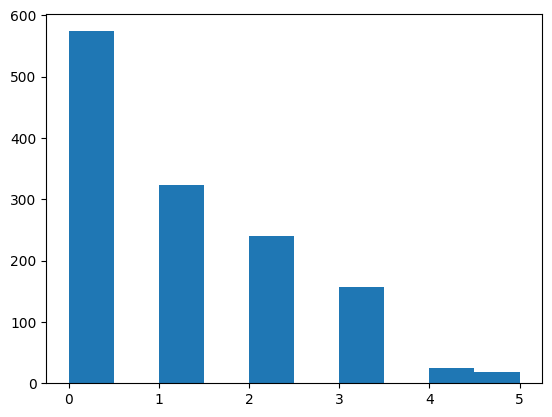

In [21]:
plt.hist(children)
plt.show()

#### BMI distribution

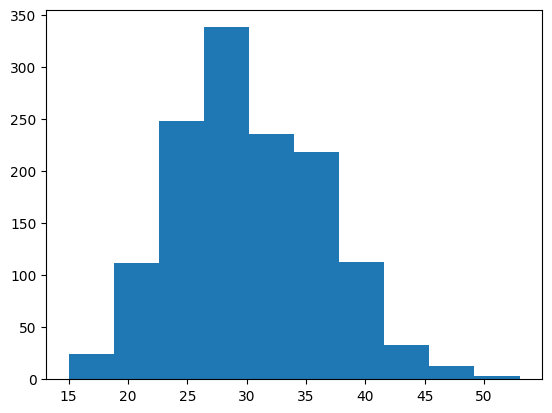

In [22]:
plt.hist(bmi)
plt.show()

#### Calculating the insurance cost who has at least one child and showing the number of those persons. 

In [23]:
parents = []
def ins_cost_parents(status=None):
    total = 0
    if status == 'yes':
        for value in new_dict.values():
            if int(value['children']) > 0:
                a = int(float(value['charges']))
                parents.append(a)
                total += a
                mean = total / len(parents)
                rounded = round(mean)
    return f'The average insurance cost for being a parent is ${rounded:,}. In this sample there are {len(parents)} parents.'

In [24]:
print(ins_cost_parents('yes'))

The average insurance cost for being a parent is $13,949. In this sample there are 764 parents.


In [ ]:
plt.hist(parents)
plt.show()

#### Using pandas

In [ ]:
df = pd.DataFrame(new_list)

In [ ]:
df.head(3)

In [ ]:
df.tail(3)

In [ ]:
df.shape

In [ ]:
df['sex'].value_counts()


In [ ]:
df['children'].value_counts()

In [ ]:
df['smoker'].value_counts()

In [ ]:
df['region'].value_counts()

In [ ]:
df.head()

In [ ]:
def mean_insurance():
    total = 0
    for num in df['charges']:
        total += int(float(num))
        mean = round(total / len(df))
    return mean

In [ ]:
mean_insurance = mean_insurance()

In [ ]:
print(f'The average insurance cost is ${mean_insurance:,}')

In [ ]:
filt = (df['smoker'] == 'yes')

In [ ]:
df[filt]

In [ ]:
smokers_list = []
def smoker_vs_nonsmokers(smoker_status):
    total_cost1 = 0
    total_cost2 = 0
    str1 = 'The number of '
    str2 = 'The average insurance cost for smokers is'
    str3 = 'The difference between the average insurance cost and the '
    for num in df[filt]['charges']:
            smokers_list.append(num)
            total_cost1 += int(float(num))
            mean1 = round(total_cost1 / len(smokers_list))
    print(f'{str1}smokers is {len(smokers_list)}. {str2} ${mean1:,}. This is ${(mean1 - mean_insurance):,} more than the ${mean_insurance:,} average insurance.')

In [ ]:
smoker_vs_nonsmokers('smoker')

In [ ]:
dfnew = pd.read_csv('insurance.csv')

In [ ]:
dfnew

In [ ]:
dfnew.sex.value_counts()

In [ ]:
round(dfnew.charges.mean())

In [ ]:
filt1 = (dfnew['smoker'] == 'yes')
filt2 = (dfnew['smoker'] == 'no')
filt3 = (dfnew['children'] == 0)
filt4 = (dfnew['children'] >= 1)
filt5 = (dfnew['sex'] == 'female')
filt6 = (dfnew['sex'] == 'male')

In [ ]:
print(f'The average insurance cost is ${round(dfnew[filt2].charges.mean()):,}')

In [ ]:
def insurance_cost(status):
    string = 'In this sample the average insurance cost for'
    if status == 'smoker':
        print(f'{string} {status}s is ${round(dfnew[filt1].charges.mean()):,}')
    elif status == 'non smoker':
        print(f'{string} {status}s is ${round(dfnew[filt2].charges.mean()):,}')
    elif status == 'parent':
        print(f'{string} {status}s is ${round(dfnew[filt3].charges.mean()):,}')
    elif status == 'no parent':
        print(f'{string} {status}s is ${round(dfnew[filt4].charges.mean()):,}')
    elif status == 'female':
        print(f'{string} {status}s is ${round(dfnew[filt5].charges.mean()):,}')
    elif status == 'male':
        print(f'{string} {status}s is ${round(dfnew[filt6].charges.mean()):,}')
    elif status == 'everyone':
        print(f'{string} {status} is ${round(dfnew[filt6].charges.mean()):,}')
    else:
        print('''Invalid data. The possible inputs are: 
["smoker", "non smoker", "parent", "no parent", "female", "male", "everyone"]''')

In [ ]:
insurance_cost('sm')